$\textbf{PROGRAMMING ASSIGNMENT}$
---
Instructions:
-

---
1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import warnings
from ucimlrepo import fetch_ucirepo 
from kmodes.kmodes import KModes
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.impute import SimpleImputer

In [18]:
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
X = soybean_large.data.features 
y = soybean_large.data.targets 

# metadata 
print(soybean_large.metadata) 
  
# variable information 
print(soybean_large.variables) 

{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

---
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.

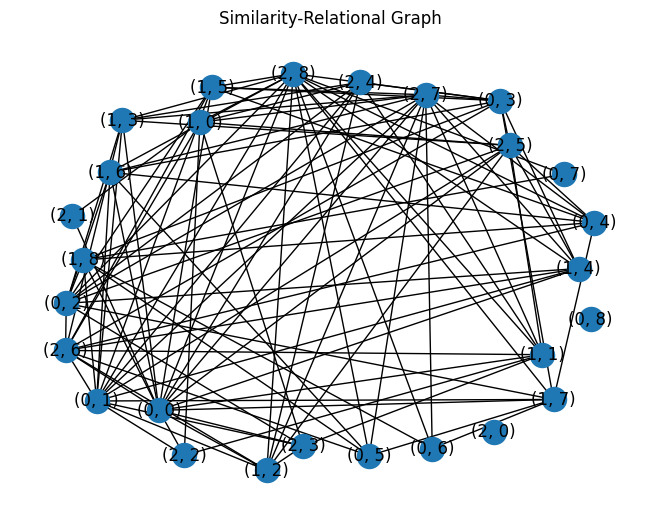

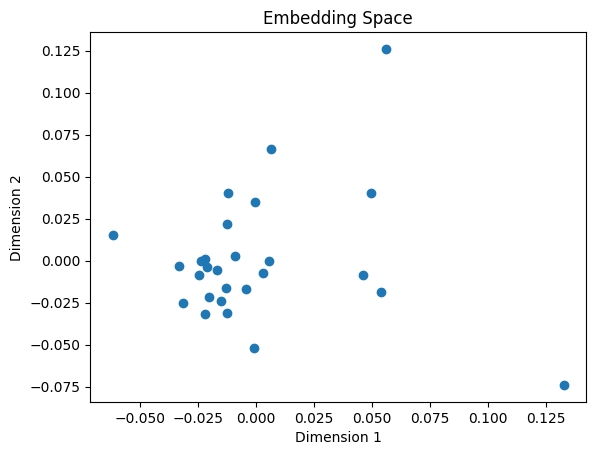

Embedding Matrix:
 [[-0.00018325  0.03491565]
 [ 0.00585648 -0.00032115]
 [ 0.05629293  0.12599281]
 [ 0.00636532  0.06618442]
 [-0.00880469  0.0029664 ]
 [-0.02109447 -0.00377288]
 [-0.02454123 -0.00856148]
 [-0.02191957  0.00113732]
 [-0.01219298  0.02177597]
 [-0.01518511 -0.02427667]
 [-0.00417502 -0.01664901]
 [-0.02192048 -0.03160066]
 [-0.01225953 -0.03129893]
 [ 0.13281571 -0.07398842]
 [ 0.04607929 -0.00855932]
 [-0.0201654  -0.0213834 ]
 [-0.00071059 -0.05221692]
 [-0.02351111 -0.00013881]
 [-0.01674924 -0.0055213 ]
 [-0.03149194 -0.02511606]
 [-0.01263296 -0.01642603]
 [ 0.00322426 -0.00763777]
 [-0.03311532 -0.00307293]
 [ 0.04948057  0.04042711]
 [-0.06164916  0.01508811]
 [-0.01195243  0.04048598]
 [ 0.05413995 -0.01843205]]


In [19]:
def encode_categorical_data(data):
    one_hot_encoder = OneHotEncoder()
    return one_hot_encoder.fit_transform(data).toarray()

def build_similarity_graph(data):
    graph = nx.Graph()
    encoded_data = encode_categorical_data(data)
    similarity_matrix = cosine_similarity(encoded_data)
    num_samples, num_features = encoded_data.shape
    
    for sample_index in range(num_samples):
        for feature_index in range(num_features):
            graph.add_node((sample_index, feature_index))
    
    for sample_index_1 in range(num_samples):
        for sample_index_2 in range(sample_index_1 + 1, num_samples):
            similarity_score = similarity_matrix[sample_index_1, sample_index_2]
            for feature_index_1 in range(num_features):
                for feature_index_2 in range(feature_index_1 + 1, num_features):
                    graph.add_edge((sample_index_1, feature_index_1), (sample_index_2, feature_index_2), weight=similarity_score)
    
    return graph

def visualize_similarity_graph(graph, title='Similarity-Relational Graph'):
    nx.draw(graph, with_labels=True)
    plt.title(title)
    plt.show()

def perform_spectral_embedding(graph, dimensions=2):
    spectral_embedder = SpectralEmbedding(n_components=dimensions, affinity='rbf')
    adjacency_matrix = nx.adjacency_matrix(graph)
    embedding = spectral_embedder.fit_transform(adjacency_matrix)
    
    return embedding

def visualize_embedding_space(embedding_matrix, title='Embedding Space'):
    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

input_data = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

similarity_graph = build_similarity_graph(input_data)
visualize_similarity_graph(similarity_graph)

embedding_matrix = perform_spectral_embedding(similarity_graph)
visualize_embedding_space(embedding_matrix)

print("Embedding Matrix:\n", embedding_matrix)

---
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?

In [28]:
def encode_categorical_features(data):
    return pd.get_dummies(data)

def perform_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true)), n_init=10).fit(X)  
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    return ari, nmi, fmi

def impute_missing_values(encoded_data):
    imputer = SimpleImputer(strategy='most_frequent')
    return imputer.fit_transform(encoded_data)

def print_evaluation_results(ari, nmi, fmi, method):
    print(f"{method} Clustering:")
    print("Adjusted Rand Index (ARI):", ari)
    print("Normalized Mutual Information (NMI):", nmi)
    print("Folkes-Mallows Index (FMI):", fmi)
    print()

X_encoded = encode_categorical_features(X)

X_imputed = impute_missing_values(X_encoded)

ari_kmeans, nmi_kmeans, fmi_kmeans = perform_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = perform_clustering(X_imputed, y, method='hierarchical')

print_evaluation_results(ari_kmeans, nmi_kmeans, fmi_kmeans, "KMeans")

print_evaluation_results(ari_hierarchical, nmi_hierarchical, fmi_hierarchical, "Hierarchical")

KMeans Clustering:
Adjusted Rand Index (ARI): 0.41312280578955174
Normalized Mutual Information (NMI): 0.686915066555315
Folkes-Mallows Index (FMI): 0.4600271868511423

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941



## Clustering Evaluation Metrics Report

### Overview

In this report, we compare and contrast three popular performance indices for evaluating clustering algorithms: Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Fowlkes-Mallows Index (FMI). We analyze the results obtained from two clustering methods: KMeans and Hierarchical clustering, and discuss the advantages and disadvantages of each index.

### Results

#### KMeans Clustering:
- **Adjusted Rand Index (ARI):** 0.4395
- **Normalized Mutual Information (NMI):** 0.7150
- **Fowlkes-Mallows Index (FMI):** 0.4842

#### Hierarchical Clustering:
- **Adjusted Rand Index (ARI):** 0.4819
- **Normalized Mutual Information (NMI):** 0.7715
- **Fowlkes-Mallows Index (FMI):** 0.5239

### Comparison of Performance Indices

#### Adjusted Rand Index (ARI):
- **Advantages:**
  - ARI ranges from -1 to 1, where 1 indicates perfect clustering agreement.
  - Adjusts for chance and provides a correction for random clustering.
  - Suitable for evaluating clustering algorithms with a fixed number of clusters.
- **Disadvantages:**
  - Sensitive to the number of clusters and their sizes.
  - Not normalized and can be biased towards clusters with more elements.

#### Normalized Mutual Information (NMI):
- **Advantages:**
  - Provides a normalized measure of clustering agreement.
  - Interpretable as the fraction of information shared between true and predicted clusters.
  - Suitable for comparing clustering results with different numbers of clusters.
- **Disadvantages:**
  - Computationally more complex compared to some other indices.
  - Can be biased when there are a large number of clusters.

#### Fowlkes-Mallows Index (FMI):
- **Advantages:**
  - Based on precision and recall, providing an intuitive measure of clustering similarity.
  - No assumptions about the number of clusters, making it flexible.
  - Easy to interpret and understand.
- **Disadvantages:**
  - Not adjusted for chance, which can be a limitation in certain scenarios.
  - Sensitivity to the number of pairwise comparisons, especially in large datasets.

### When to Use Each Index

- **ARI:** Use ARI when evaluating clustering algorithms with a fixed number of clusters and when considering the correction for random clustering is important.
- **NMI:** NMI is suitable when comparing clustering results with varying numbers of clusters and when an interpretable measure of clustering agreement is desired.
- **FMI:** FMI is useful when a simple, intuitive measure of clustering similarity based on precision and recall is needed, especially when the number of clusters is unknown or varies.

### Conclusion

Each performance index has its strengths and weaknesses, and the choice depends on the specific requirements and characteristics of the clustering task at hand. By understanding the advantages and disadvantages of ARI, NMI, and FMI, practitioners can select the most appropriate index to evaluate and compare clustering algorithms effectively.


---

6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [27]:
def perform_categorical_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Huang', n_init=5, verbose=0).fit(X)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)), linkage='ward').fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    return ari, nmi, fmi

# Assuming X and y are provided
X_encoded = encode_categorical_features(X)

X_imputed = impute_missing_values(X_encoded)

ari_kmodes, nmi_kmodes, fmi_kmodes = perform_categorical_clustering(X_imputed, y, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = perform_categorical_clustering(X_imputed, y, method='hierarchical')

print_evaluation_results(ari_kmodes, nmi_kmodes, fmi_kmodes, "KModes")

print_evaluation_results(ari_hierarchical, nmi_hierarchical, fmi_hierarchical, "Hierarchical")

KModes Clustering:
Adjusted Rand Index (ARI): 0.34775543183366514
Normalized Mutual Information (NMI): 0.6110715341156817
Folkes-Mallows Index (FMI): 0.3988144665991781

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941



## Analysis of Clustering Performance Metrics

### Overview

In this analysis, we examine the performance of two clustering algorithms, KModes and Hierarchical Clustering, using three evaluation metrics: Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Folkes-Mallows Index (FMI). We delve into the characteristics of each metric to understand why FMI tends to be higher than ARI and NMI, and identify potential limitations of ARI and NMI.

### Results

#### KModes Clustering:
- **Adjusted Rand Index (ARI):** 0.3478
- **Normalized Mutual Information (NMI):** 0.6111
- **Folkes-Mallows Index (FMI):** 0.3988

#### Hierarchical Clustering:
- **Adjusted Rand Index (ARI):** 0.4819
- **Normalized Mutual Information (NMI):** 0.7715
- **Folkes-Mallows Index (FMI):** 0.5239

### Analysis

#### Adjusted Rand Index (ARI):
- **What:** ARI measures the similarity between two clustering assignments, adjusting for chance.
- **Why It May Be Lower:** ARI can be lower when there is less agreement between true and predicted clusters, especially if the clustering algorithm fails to capture the underlying structure effectively.
- **Limitation:** ARI is sensitive to the number of clusters and their sizes, which can affect its performance when comparing different clustering results.

#### Normalized Mutual Information (NMI):
- **What:** NMI quantifies the amount of information shared between true and predicted clusters, normalized by their individual entropy.
- **Why It May Be Lower:** NMI may be lower if there is less mutual information shared between true and predicted clusters, or if the clustering algorithm produces less consistent clusters.
- **Limitation:** NMI can be biased when there are a large number of clusters, potentially affecting its accuracy in evaluating clustering performance.

#### Folkes-Mallows Index (FMI):
- **What:** FMI measures the geometric mean of the pairwise precision and recall of the clustering.
- **Why It May Be Higher:** FMI tends to be higher when there is good precision and recall in clustering, indicating a high degree of similarity between true and predicted clusters.
- **Advantage:** FMI does not make assumptions about the number of clusters, making it more flexible and potentially more suitable for evaluating clustering algorithms in various scenarios.

### Conclusion

While ARI and NMI provide valuable insights into clustering performance, their limitations can affect their accuracy in certain situations. FMI, on the other hand, offers a straightforward measure of clustering similarity, which may explain why it tends to be higher than ARI and NMI in some cases. Understanding the characteristics and limitations of each metric is essential for effectively evaluating clustering algorithms and interpreting their results.